In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# read the CSV file
df = pd.read_csv('/content/screening_exercise_orders_v201810.csv')

In [3]:
# checkout the data
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [4]:
# get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [5]:
# check for null values
df.isnull().sum()

customer_id         0
gender              0
date                0
value               0
predicted_gender    0
dtype: int64

A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [6]:
# covert the date column to datetime datatype
df['date'] = pd.to_datetime(df['date'])

In [7]:
# create dataframe
df1 = pd.DataFrame()

# create 'most_recent_order_date' and 'order_count' columns
df1['most_recent_order_date'] = df.groupby(['customer_id'])['date'].apply(lambda x: x.nlargest(1).max())
df1['order_count'] = df.groupby(by='customer_id')['customer_id'].count()

In [8]:
# checkout new created dataframe
df1.head()

,most_recent_order_date,order_count
customer_id,,
1000,2017-01-01 00:11:31,1
1001,2017-01-01 00:29:56,1
1002,2017-02-19 21:35:31,3
1003,2017-04-26 02:37:20,4
1004,2017-01-01 03:11:54,1


In [9]:
# create new dataframe and add 'customer_id', 'gender' columns to it
klvy = pd.DataFrame()
klvy = df[['customer_id', 'gender']]

In [10]:
# merge the two dataframes
klvy = pd.merge(left=klvy, right=df1, how='left', on='customer_id')

In [11]:
# calculate duplicate rows
klvy.duplicated().sum()

4657

In [12]:
# drop duplicate rows
klvy.drop_duplicates(inplace=True)

In [13]:
# get summary of the dataframe
klvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8814 entries, 0 to 13469
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             8814 non-null   int64         
 1   gender                  8814 non-null   int64         
 2   most_recent_order_date  8814 non-null   datetime64[ns]
 3   order_count             8814 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 344.3 KB


In [14]:
# check for null values
klvy.isnull().sum()

customer_id               0
gender                    0
most_recent_order_date    0
order_count               0
dtype: int64

### Sorted dataframe by customer_id in ascending order and displaying the first 10 rows.

In [15]:
# Sorted dataframe by customer_id in ascending order and displaying the first 10 rows.
klvy.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


B) Plot the count of orders per week for the store.

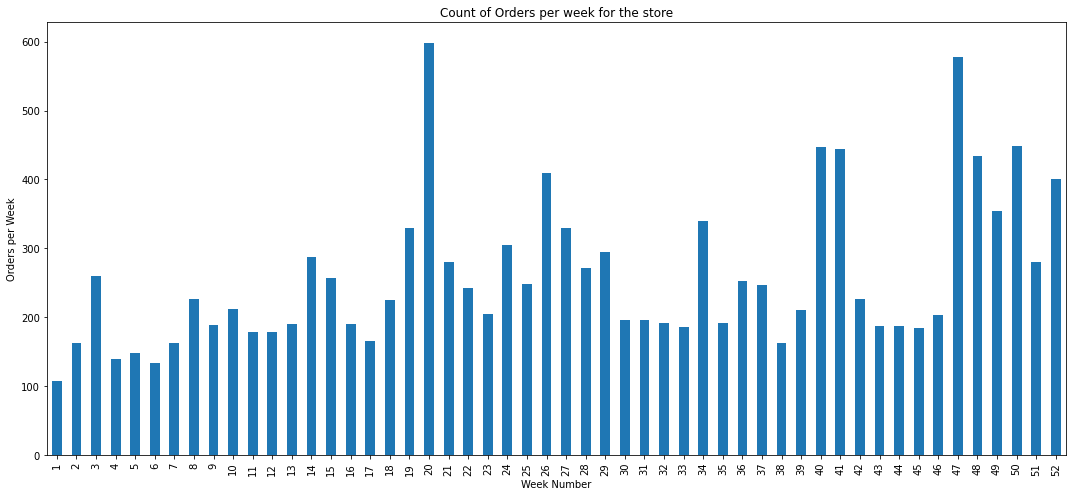

In [16]:
plt.figure(figsize=(15,7))
klvy.groupby(klvy.most_recent_order_date.dt.week)['order_count'].sum().plot(kind='bar')
plt.title('Count of Orders per week for the store')
plt.xlabel('Week Number')
plt.ylabel('Orders per Week')
plt.tight_layout()

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

    I do not find the difference to be significant. The difference in mean order value for gender 0 and gender 1 is 13.

In [17]:
# mean order value for gender 0
df[(df['gender'] == 0)]['value'].mean()

363.89000591803506

In [18]:
# mean order value for gender 1
df[(df['gender'] == 1)]['value'].mean()

350.70836114422

In [35]:
#df.groupby('gender')['value'].mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

    In the classification report the f1-score is 64% which indicates that the quality of the prediction is not acceptable.

In [19]:
# confusion matrix
print(confusion_matrix(df.gender, df.predicted_gender))

[[3349 3410]
 [1463 5249]]


In [21]:
# classification report
print(classification_report(df.gender, df.predicted_gender))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

> I have worked on a project called Hand Emojinator which predicts Hand Emojis when hand gestures are made on a video stream. I did not had data to train the machine learning model and had to manually collect images of hand gestures to input the deep learning model. The concept of Convolutional Neural Networks (CNNs) was used for building the classifier model. After training and testing the model, its accuracy was not acceptable. To overcome low model accuracy, I used the concept of Transfer Learning, in which you use the learnings of another pre-trained model and embed it into your model to increase its accuracy by which my model was providing good accuracy on predicting Hand Emojis.